## lab 07-2: Meet MNIST Dataset (new)

### MNIST Dataset
손으로 숫자를 글씨 정보를 갖고있는 데이터 셋<br/>
우체국에서 손으로 작성한 글씨를 판별하기 위해 만든 데이터 셋

28 X 28 X I image 데이터 셋으로<br/>
**784(28 * 28)**개의 **X데이터**를 갖고 **Y데이터**는 **0 ~ 9 사이의 숫자**를 갖는다.<br/>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 ~ 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


<br/>

### Softmax

In [2]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimzer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

<br/>

### Training epoch/batch
한번에 몇개씩 학습시킬시 결정하는 것이 **batch size**<br/>
전체 데이터 셋을 한 번 다 도는 것을 **1epoch** 라고 한다.

예를 들어 **1000**개의 **Data Set**이 있을 경우<br/>
**Batch size**가 **500**일 경우 **2번의 반복**으로 **1번의 epoch**가 완료된다.

따라서 아래의 코드는 **epoch** `15`이고<br/>
**batch siz**e가 `100`이므로<br/>
밖의 for문에서 **15**번의 반복이 일어나고<br/>
안쪽 for문에서 **데이터의 개수 / 100** 만큼의 반복이 일어나며<br/>
**100개의 데이터**씩 학습시키고 **안쪽 루프**가 끝나면 **1epoch**이 종료된다.<br/>

Epoch: 0001, Cost: 2.697827901
Epoch: 0002, Cost: 1.077157190
Epoch: 0003, Cost: 0.864903082
Epoch: 0004, Cost: 0.759544095
Epoch: 0005, Cost: 0.692458839
Epoch: 0006, Cost: 0.643773215
Epoch: 0007, Cost: 0.606989562
Epoch: 0008, Cost: 0.577427680
Epoch: 0009, Cost: 0.552740937
Epoch: 0010, Cost: 0.532466000
Epoch: 0011, Cost: 0.515204259
Epoch: 0012, Cost: 0.499481865
Epoch: 0013, Cost: 0.486141274
Epoch: 0014, Cost: 0.473691142
Epoch: 0015, Cost: 0.463160439
Learning finished
Accuracy:  0.8924
Label:  [8]
Prediction:  [8]


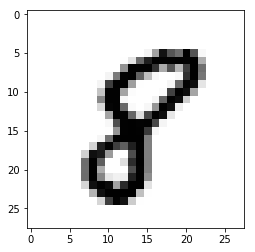

In [3]:
# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([optimzer, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
                                                   
    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    
    # Sample image show and prediction
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()